# 茨城県の人口推移と土地価格の推移



・人口総数のマップをプロット（22年分）
・土地価格（地価価格）マップをプロット（22年分）

それぞれのマップをアニメーション化、22年間でどのような変化があるか可視化する。

また、人口総数と地価価格の相関はあるかどうか見る。



In [2]:
import geopandas as gpd
import pandas as pd

In [3]:
# データを変数に入れる
ibaraki = gpd.read_file('ibaraki.geojson')

<Axes: >

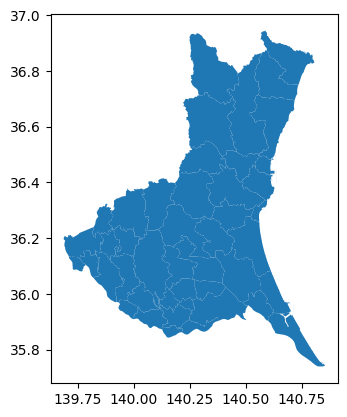

In [4]:
ibaraki.plot()

In [5]:
ibaraki

,N03_001,N03_002,N03_003,N03_004,N03_005,N03_007,geometry
0,茨城県,None,None,水戸市,None,08201,"POLYGON ((140.50173 36.30390, 140.50216 36.303..."
1,茨城県,None,None,日立市,None,08202,"POLYGON ((140.62736 36.48348, 140.62697 36.483..."
2,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63352 36.48167, 140.63349 36.481..."
3,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63684 36.48263, 140.63683 36.479..."
4,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63091 36.49787, 140.63081 36.498..."
...,...,...,...,...,...,...,...
215,茨城県,None,猿島郡,五霞町,None,08542,"POLYGON ((139.77252 36.08333, 139.77252 36.083..."
216,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.81903 36.05802, 139.82017 36.057..."
217,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.84043 36.08864, 139.84028 36.088..."
218,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.84335 36.09704, 139.84319 36.097..."


In [6]:
# rename
ibaraki.rename(columns={'N03_007':'KEY_CODE'},inplace=True)

In [10]:
print(ibaraki['KEY_CODE'])

0      08201
1      08202
2      08202
3      08202
4      08202
       ...  
215    08542
216    08546
217    08546
218    08546
219    08564
Name: KEY_CODE, Length: 220, dtype: object


In [11]:
print(ibaraki['KEY_CODE'].to_list())

['08201', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08202', '08203', '08204', '08205', '08207', '08208', '08208', '08210', '08210', '08211', '08212', '08214', '08214', '08214', '08214', '08214', '08214', '08214', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08215', '08216', '08217', '08219', '08220', '08221', '08221', '08221', '08221', '08222', '08222', '08222', '08223', '08224', '08225', '08226', '08227', '08228', '08228', '08228', '08229', '08230', '08231', '08232', '08232', '08232', '08232', '08232', '08233', '08234', '08235', '08236', '08302', '08309', '08309', '08309', '08309', 

In [13]:
unique_ibaraki = ibaraki[['KEY_CODE', 'N03_004']].drop_duplicates()

In [14]:
print(unique_ibaraki)

    KEY_CODE  N03_004
0      08201      水戸市
1      08202      日立市
33     08203      土浦市
34     08204      古河市
35     08205      石岡市
36     08207      結城市
37     08208     龍ケ崎市
39     08210      下妻市
41     08211      常総市
42     08212    常陸太田市
43     08214      高萩市
50     08215     北茨城市
75     08216      笠間市
76     08217      取手市
77     08219      牛久市
78     08220     つくば市
79     08221   ひたちなか市
83     08222      鹿嶋市
86     08223      潮来市
87     08224      守谷市
88     08225    常陸大宮市
89     08226      那珂市
90     08227      筑西市
91     08228      坂東市
94     08229      稲敷市
95     08230  かすみがうら市
96     08231      桜川市
97     08232      神栖市
102    08233      行方市
103    08234      鉾田市
104    08235  つくばみらい市
105    08236     小美玉市
106    08302      茨城町
107    08309      大洗町
206    08310      城里町
207    08341      東海村
210    08364      大子町
211    08442      美浦村
212    08443      阿見町
213    08447      河内町
214    08521     八千代町
215    08542      五霞町
216    08546       境町
219    08564      利根町


In [16]:
file_path = 'C:\Users\sui7z\OneDrive\python/unique_ibaraki.csv'
unique_ibaraki.to_csv(file_path, index=False)

file_path

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3835420295.py, line 1)

In [26]:

# CSVファイルとして保存 (UTF-8エンコーディング)
file_path = r'C:\Users\sui7z\OneDrive\python\unique_ibaraki.csv'
unique_ibaraki.to_csv(file_path, index=False, encoding='utf-8')

In [27]:
# CSVファイルとして保存 (Shift_JISエンコーディング)
file_path = r'C:\Users\sui7z\OneDrive\python\unique_ibaraki.csv'
unique_ibaraki.to_csv(file_path, index=False, encoding='shift_jis')

In [7]:
ibaraki_pop = pd.read_csv('finalgis.csv')

In [8]:
ibaraki_pop

,KEY_CODE,市区町村,年度,人口,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,8201,水戸市,平成14年,262949,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8201,水戸市,平成15年,263845,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8201,水戸市,平成16年,264136,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8201,水戸市,平成17年,262603,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8201,水戸市,平成18年,263267,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,8564,利根町,令和元年,15403,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
964,8564,利根町,令和2年,15340,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
965,8564,利根町,令和3年,15181,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,8564,利根町,令和4年,14966,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ibaraki_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   KEY_CODE     968 non-null    int64  
 1   市区町村         968 non-null    object 
 2   年度           968 non-null    object 
 3   人口           968 non-null    int64  
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [16]:
import pandas as pd
import numpy as np

ibaraki_pop_dropped = ibaraki_pop.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46'])
ibaraki_pop = ibaraki_pop_dropped

In [17]:
ibaraki_pop

,KEY_CODE,市区町村,年度,人口
0,8201,水戸市,平成14年,262949
1,8201,水戸市,平成15年,263845
2,8201,水戸市,平成16年,264136
3,8201,水戸市,平成17年,262603
4,8201,水戸市,平成18年,263267
...,...,...,...,...
963,8564,利根町,令和元年,15403
964,8564,利根町,令和2年,15340
965,8564,利根町,令和3年,15181
966,8564,利根町,令和4年,14966


In [18]:
ibaraki

,N03_001,N03_002,N03_003,N03_004,N03_005,KEY_CODE,geometry
0,茨城県,None,None,水戸市,None,08201,"POLYGON ((140.50173 36.30390, 140.50216 36.303..."
1,茨城県,None,None,日立市,None,08202,"POLYGON ((140.62736 36.48348, 140.62697 36.483..."
2,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63352 36.48167, 140.63349 36.481..."
3,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63684 36.48263, 140.63683 36.479..."
4,茨城県,None,None,日立市,None,08202,"POLYGON ((140.63091 36.49787, 140.63081 36.498..."
...,...,...,...,...,...,...,...
215,茨城県,None,猿島郡,五霞町,None,08542,"POLYGON ((139.77252 36.08333, 139.77252 36.083..."
216,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.81903 36.05802, 139.82017 36.057..."
217,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.84043 36.08864, 139.84028 36.088..."
218,茨城県,None,猿島郡,境町,None,08546,"POLYGON ((139.84335 36.09704, 139.84319 36.097..."


In [20]:
ibaraki.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   220 non-null    object  
 1   N03_002   0 non-null      object  
 2   N03_003   114 non-null    object  
 3   N03_004   220 non-null    object  
 4   N03_005   0 non-null      object  
 5   KEY_CODE  220 non-null    object  
 6   geometry  220 non-null    geometry
dtypes: geometry(1), object(6)
memory usage: 12.2+ KB


In [21]:
# OBJECTからintに変える
ibaraki['KEY_CODE'] = ibaraki['KEY_CODE'].astype(int)

In [22]:
# ここでようやく merge コマンドで統合させて、新しい変数に入れる
ibaraki_pop = ibaraki.merge(ibaraki_pop,on='KEY_CODE')

In [23]:
ibaraki_pop

,N03_001,N03_002,N03_003,N03_004,N03_005,KEY_CODE,geometry,市区町村,年度,人口
0,茨城県,None,None,水戸市,None,8201,"POLYGON ((140.50173 36.30390, 140.50216 36.303...",水戸市,平成14年,262949
1,茨城県,None,None,水戸市,None,8201,"POLYGON ((140.50173 36.30390, 140.50216 36.303...",水戸市,平成15年,263845
2,茨城県,None,None,水戸市,None,8201,"POLYGON ((140.50173 36.30390, 140.50216 36.303...",水戸市,平成16年,264136
3,茨城県,None,None,水戸市,None,8201,"POLYGON ((140.50173 36.30390, 140.50216 36.303...",水戸市,平成17年,262603
4,茨城県,None,None,水戸市,None,8201,"POLYGON ((140.50173 36.30390, 140.50216 36.303...",水戸市,平成18年,263267
...,...,...,...,...,...,...,...,...,...,...
4835,茨城県,None,北相馬郡,利根町,None,8564,"POLYGON ((140.12738 35.88210, 140.12713 35.881...",利根町,令和元年,15403
4836,茨城県,None,北相馬郡,利根町,None,8564,"POLYGON ((140.12738 35.88210, 140.12713 35.881...",利根町,令和2年,15340
4837,茨城県,None,北相馬郡,利根町,None,8564,"POLYGON ((140.12738 35.88210, 140.12713 35.881...",利根町,令和3年,15181
4838,茨城県,None,北相馬郡,利根町,None,8564,"POLYGON ((140.12738 35.88210, 140.12713 35.881...",利根町,令和4年,14966


In [24]:
ibaraki_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   4840 non-null   object  
 1   N03_002   0 non-null      object  
 2   N03_003   2508 non-null   object  
 3   N03_004   4840 non-null   object  
 4   N03_005   0 non-null      object  
 5   KEY_CODE  4840 non-null   int32   
 6   geometry  4840 non-null   geometry
 7   市区町村      4840 non-null   object  
 8   年度        4840 non-null   object  
 9   人口        4840 non-null   int64   
dtypes: geometry(1), int32(1), int64(1), object(7)
memory usage: 359.3+ KB


In [27]:
pip install pandas


In [28]:
import pandas as pd

# '年度'列に平成14年の行だけを抽出
df_filtered = ibaraki_pop[ibaraki_pop['年度'] == '平成14年']

# 結果を新しいCSVファイルに保存
df_filtered.to_csv('ibaraki_pop14.csv', index=False)

# 結果を表示
print(df_filtered)


     N03_001 N03_002 N03_003 N03_004 N03_005  KEY_CODE  \
0        茨城県    None    None     水戸市    None      8201   
22       茨城県    None    None     日立市    None      8202   
44       茨城県    None    None     日立市    None      8202   
66       茨城県    None    None     日立市    None      8202   
88       茨城県    None    None     日立市    None      8202   
...      ...     ...     ...     ...     ...       ...   
4730     茨城県    None     猿島郡     五霞町    None      8542   
4752     茨城県    None     猿島郡      境町    None      8546   
4774     茨城県    None     猿島郡      境町    None      8546   
4796     茨城県    None     猿島郡      境町    None      8546   
4818     茨城県    None    北相馬郡     利根町    None      8564   

                                               geometry 市区町村     年度      人口  
0     POLYGON ((140.50173 36.30390, 140.50216 36.303...  水戸市  平成14年  262949  
22    POLYGON ((140.62736 36.48348, 140.62697 36.483...  日立市  平成14年  204679  
44    POLYGON ((140.63352 36.48167, 140.63349 36.481...  日立市  平成14年  

In [29]:
df_filtered

,N03_001,N03_002,N03_003,N03_004,N03_005,KEY_CODE,geometry,市区町村,年度,人口
0,茨城県,None,None,水戸市,None,8201,"POLYGON ((140.50173 36.30390, 140.50216 36.303...",水戸市,平成14年,262949
22,茨城県,None,None,日立市,None,8202,"POLYGON ((140.62736 36.48348, 140.62697 36.483...",日立市,平成14年,204679
44,茨城県,None,None,日立市,None,8202,"POLYGON ((140.63352 36.48167, 140.63349 36.481...",日立市,平成14年,204679
66,茨城県,None,None,日立市,None,8202,"POLYGON ((140.63684 36.48263, 140.63683 36.479...",日立市,平成14年,204679
88,茨城県,None,None,日立市,None,8202,"POLYGON ((140.63091 36.49787, 140.63081 36.498...",日立市,平成14年,204679
...,...,...,...,...,...,...,...,...,...,...
4730,茨城県,None,猿島郡,五霞町,None,8542,"POLYGON ((139.77252 36.08333, 139.77252 36.083...",五霞町,平成14年,10180
4752,茨城県,None,猿島郡,境町,None,8546,"POLYGON ((139.81903 36.05802, 139.82017 36.057...",境町,平成14年,27080
4774,茨城県,None,猿島郡,境町,None,8546,"POLYGON ((139.84043 36.08864, 139.84028 36.088...",境町,平成14年,27080
4796,茨城県,None,猿島郡,境町,None,8546,"POLYGON ((139.84335 36.09704, 139.84319 36.097...",境町,平成14年,27080


<Axes: >

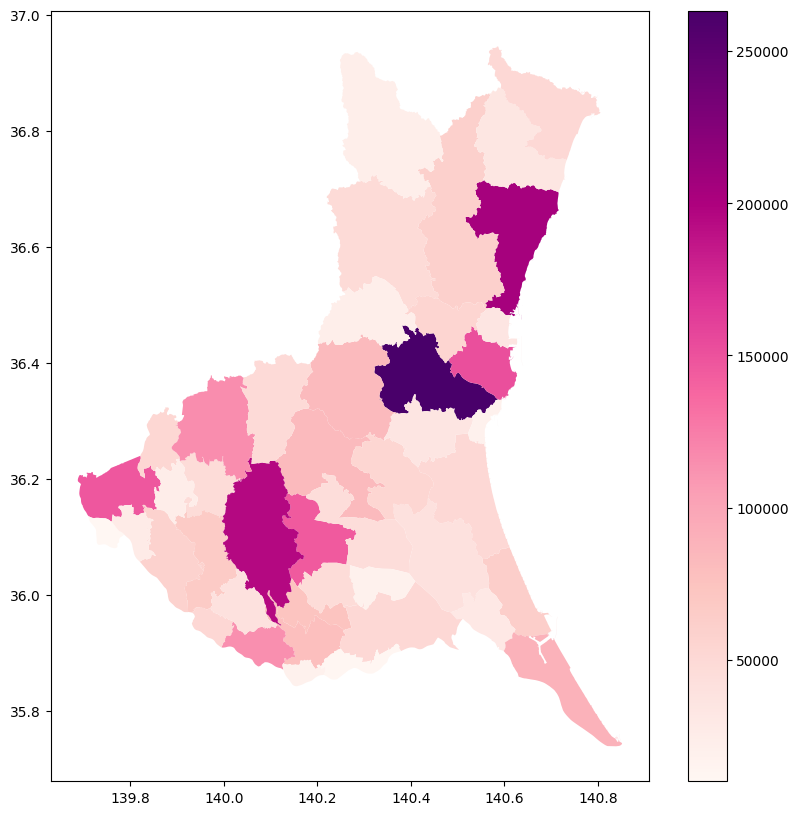

In [33]:
df_filtered.plot(figsize=(10,10),
                  column='人口',
                  legend=True,
                  cmap='RdPu')

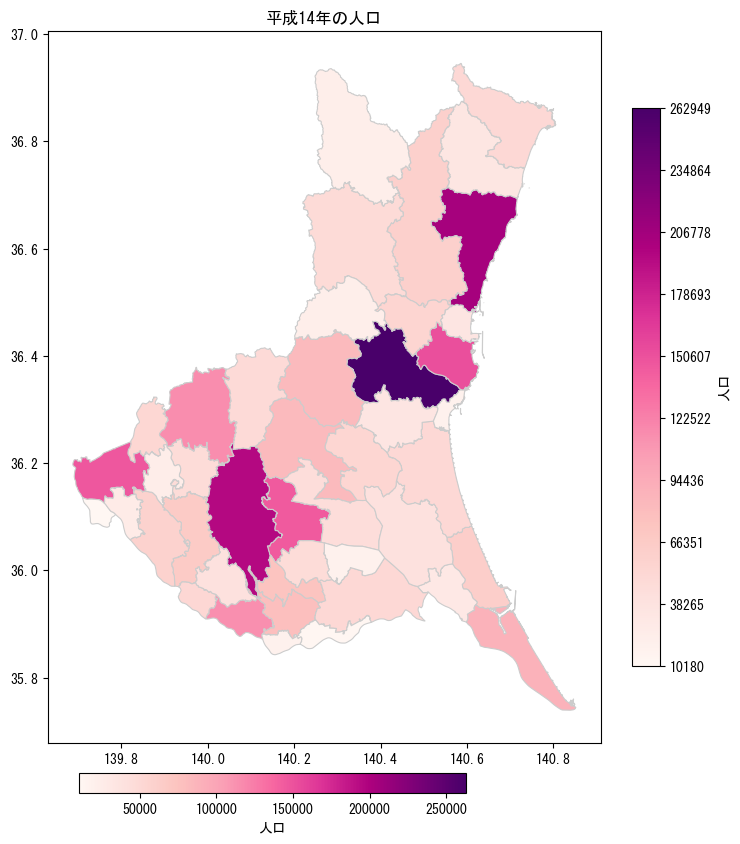

In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# 日本語フォントの設定（例: WindowsのMS Gothic）
plt.rcParams['font.family'] = 'MS Gothic'  # WindowsのMS Gothicを使用する例

# GeoDataFrameに変換 (既にgeometryが含まれている場合)
gdf = gpd.GeoDataFrame(df_filtered)

# カラーマップを作成
cmap = plt.get_cmap('RdPu', 256)  # 256段階のカラーマップ

# プロット
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='人口', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, 
         legend_kwds={'label': "人口", 'orientation': "horizontal", 'fraction': 0.036, 'pad': 0.04, 'shrink': 0.5})

# カラーバーの設定
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=gdf['人口'].min(), vmax=gdf['人口'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.036, pad=0.04, ticks=np.linspace(gdf['人口'].min(), gdf['人口'].max(), 10))
cbar.set_label('人口')

ax.set_title('平成14年の人口')
plt.show()
